In [26]:
import xfreq_analysis
import h5py, os
from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from ecog.utils import bands

In [27]:
folder = os.path.join(os.environ['HOME'],'Development/data/ecog/AA_ff/')
subjects = ['ec2', 'ec9', 'gp31', 'gp33']
files = ['EC2_blocks_1_8_9_15_76_89_105_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'EC9_blocks_15_39_46_49_53_60_63_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP31_blocks_1_2_4_6_9_21_63_65_67_69_71_78_82_83_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP33_blocks_1_5_30_CV_AA_ff_align_window_-0.5_to_0.79_file.h5']

# Create data

In [28]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
channels = [103, 106]
with h5py.File(os.path.join(folder, files[0])) as f:
    for ch in channels:
        xfreq_analysis.save_power(f, ch, cv, subject)

In [30]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_correlations(f, subject)

ec2
ec9
gp31
gp33


In [31]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_hg_power(f, subject)

ec2
ec9
gp31
gp33


# Plot data

In [32]:
f, ax = plt.subplots(1)
for s in subjects:
    xfreq_analysis.plot_power_correlations(s, ax, num=2)

In [36]:
plt.close()
f = plt.figure(figsize=(6, 10))

l_edge = .05
t_edge = .05
r_edge = .05
b_edge = .05

v_gap = .15

h1_gap = .05
h2_gap = .05
h3_gap = .05

r1_height = .3
r3_height = .175
r4_height = r3_height
r2_height = 1. - t_edge - r1_height - h1_gap - h2_gap - r3_height - h3_gap - r4_height - b_edge

width = (1. - l_edge - r_edge - v_gap) / 2.

c1_x = l_edge + width + v_gap

r1_y = h1_gap + r2_height + h2_gap + r3_height + h3_gap + r4_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])

r2_y = h2_gap + r3_height + h3_gap + r4_height + b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

r3_y = h3_gap + r4_height + b_edge
ax4 = f.add_axes([l_edge, r3_y, width, r3_height])
ax5 = f.add_axes([c1_x, r3_y, width, r3_height])

r4_y = b_edge
ax6 = f.add_axes([l_edge, r4_y, width, r4_height])
ax7 = f.add_axes([c1_x, r4_y, width, r4_height])

/home/jesse/Development/pylearn2/pylearn2/scripts/ecog/xfreq_analysis.py:374: RuntimeWarning: Mean of empty slice.
  mean = xcorr_freq_low.mean(axis=(1))
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


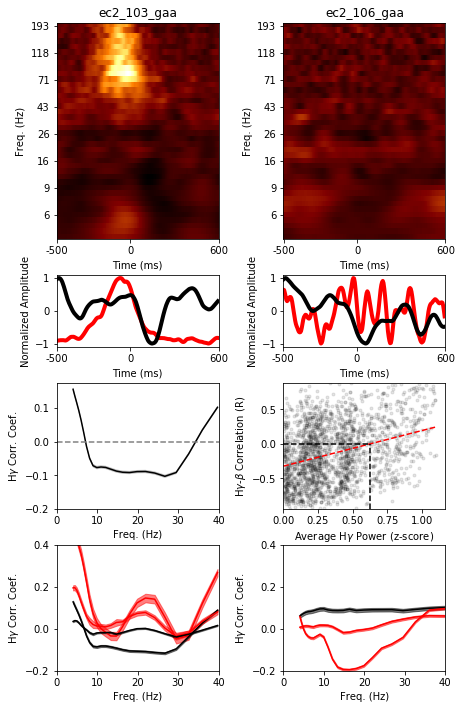

In [37]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
ch = 103
xfreq_analysis.plot_power(subject, ch, cv, [ax0, ax2], vmin=-0.725590412048, vmax=2.90856576009)

ch = 106
xfreq_analysis.plot_power(subject, ch, cv, [ax1, ax3], vmin=-0.725590412048, vmax=2.90856576009)

xfreq_analysis.plot_correlations(subject, ax4, kind='freq')

xfreq_analysis.plot_power_correlations(subject, ax5, num=2)

xfreq_analysis.plot_resolved_power_correlations(['ec2', 'gp33'], ax6)
xfreq_analysis.plot_resolved_power_correlations(['ec9', 'gp31'], ax7)

plt.savefig('/home/jesse/Downloads/xfreq.pdf')

plt.show()